<a href="https://colab.research.google.com/github/txusser/Master_IA_Sanidad/blob/main/2_3_4_Modelado_y_evaluaci%C3%B3n_de_resultados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modelado y métricas de desempeño

In [2]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para visualizaciones
sns.set_theme(style="darkgrid")
sns.set_palette("pastel")

In [3]:
# Vamos a trabajar con el conjuto de datos de diabetes de Scikit-learn
from sklearn.datasets import load_diabetes

# Cargar el conjunto de datos de diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Convertir el objetivo en un problema de clasificación binaria
# Consideraremos que un valor por encima de la mediana es "diabetes positivo"
y_binary = (y > np.median(y)).astype(int)

# Crear un DataFrame con nombres de características
feature_names = diabetes.feature_names
data = pd.DataFrame(X, columns=feature_names)
data['diabetes'] = y_binary

Forma de los conjuntos de datos:
 - X_train: (353, 10)
 - X_test: (89, 10)
 - y_train: (353,)
 - y_test: (89,)


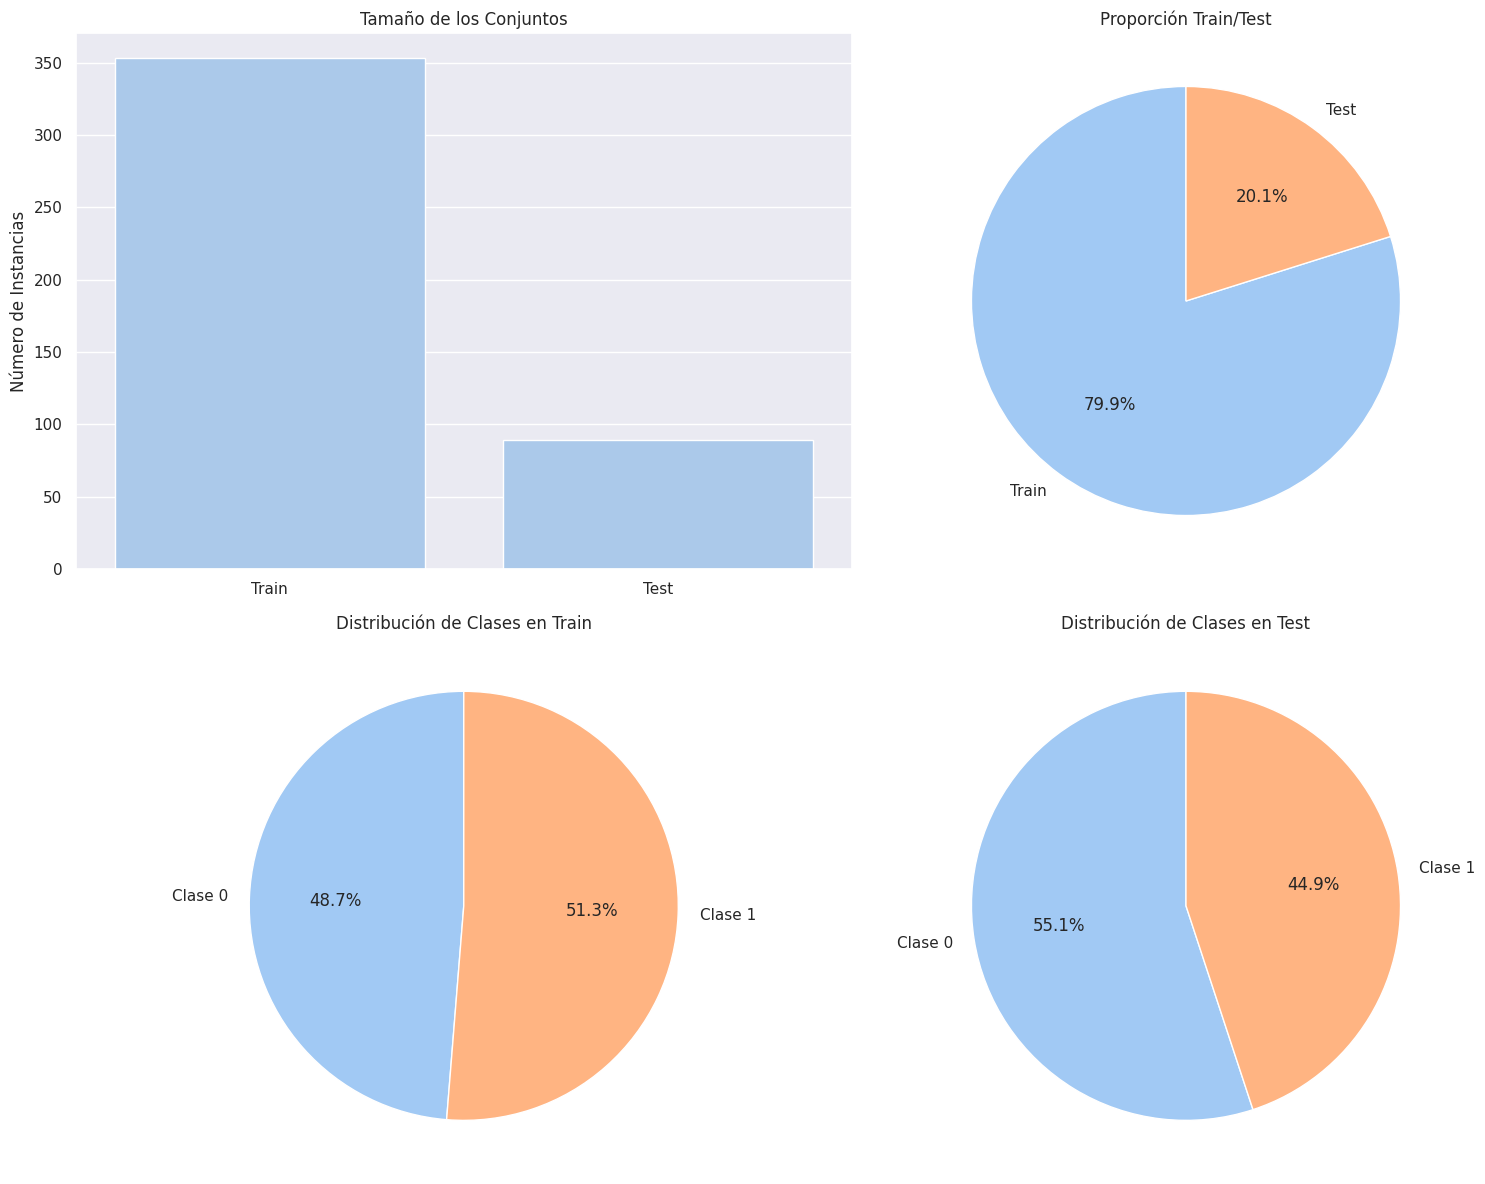


Estadísticas:
Ratio Train/Test: 0.80

Distribución de Clases:
Clase 0:
 - Train: 172 (48.7%)
 - Test: 49 (55.1%)
Clase 1:
 - Train: 181 (51.3%)
 - Test: 40 (44.9%)


In [4]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)


# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def visualize_train_test_split(X_train, X_test, y_train, y_test):
    """
    Visualiza la distribución de los conjuntos de entrenamiento y prueba,
    incluyendo el tamaño de los conjuntos y la distribución de clases.

    Args:
    X_train, X_test, y_train, y_test: Conjuntos de datos divididos
    """
    plt.figure(figsize=(16, 12))

    # Información textual
    print("Forma de los conjuntos de datos:")
    print(f" - X_train: {X_train.shape}")
    print(f" - X_test: {X_test.shape}")
    print(f" - y_train: {y_train.shape}")
    print(f" - y_test: {y_test.shape}")

    # Tamaño de los conjuntos
    sizes = {
        'Train': X_train.shape[0],
        'Test': X_test.shape[0]
    }

    # Distribución de clases
    train_class_dist = np.bincount(y_train)
    test_class_dist = np.bincount(y_test)

    # Gráfico de barras para el tamaño de los conjuntos
    plt.subplot(2, 2, 1)
    sns.barplot(x=list(sizes.keys()), y=list(sizes.values()))
    plt.title('Tamaño de los Conjuntos')
    plt.ylabel('Número de Instancias')

    # Gráfico circular para la proporción Train/Test
    plt.subplot(2, 2, 2)
    plt.pie(sizes.values(), labels=sizes.keys(), autopct='%1.1f%%', startangle=90)
    plt.title('Proporción Train/Test')

    # Gráfico de pastel para la distribución de clases en Train
    plt.subplot(2, 2, 3)
    plt.pie(train_class_dist, labels=[f'Clase {i}' for i in range(len(train_class_dist))],
            autopct='%1.1f%%', startangle=90)
    plt.title('Distribución de Clases en Train')

    # Gráfico de pastel para la distribución de clases en Test
    plt.subplot(2, 2, 4)
    plt.pie(test_class_dist, labels=[f'Clase {i}' for i in range(len(test_class_dist))],
            autopct='%1.1f%%', startangle=90)
    plt.title('Distribución de Clases en Test')

    plt.tight_layout()
    plt.show()

    # Información adicional
    print("\nEstadísticas:")
    print(f"Ratio Train/Test: {sizes['Train'] / (sizes['Train'] + sizes['Test']):.2f}")
    print("\nDistribución de Clases:")
    for i in range(len(train_class_dist)):
        print(f"Clase {i}:")
        print(f" - Train: {train_class_dist[i]} ({train_class_dist[i]/sum(train_class_dist)*100:.1f}%)")
        print(f" - Test: {test_class_dist[i]} ({test_class_dist[i]/sum(test_class_dist)*100:.1f}%)")


visualize_train_test_split(X_train, X_test, y_train, y_test)

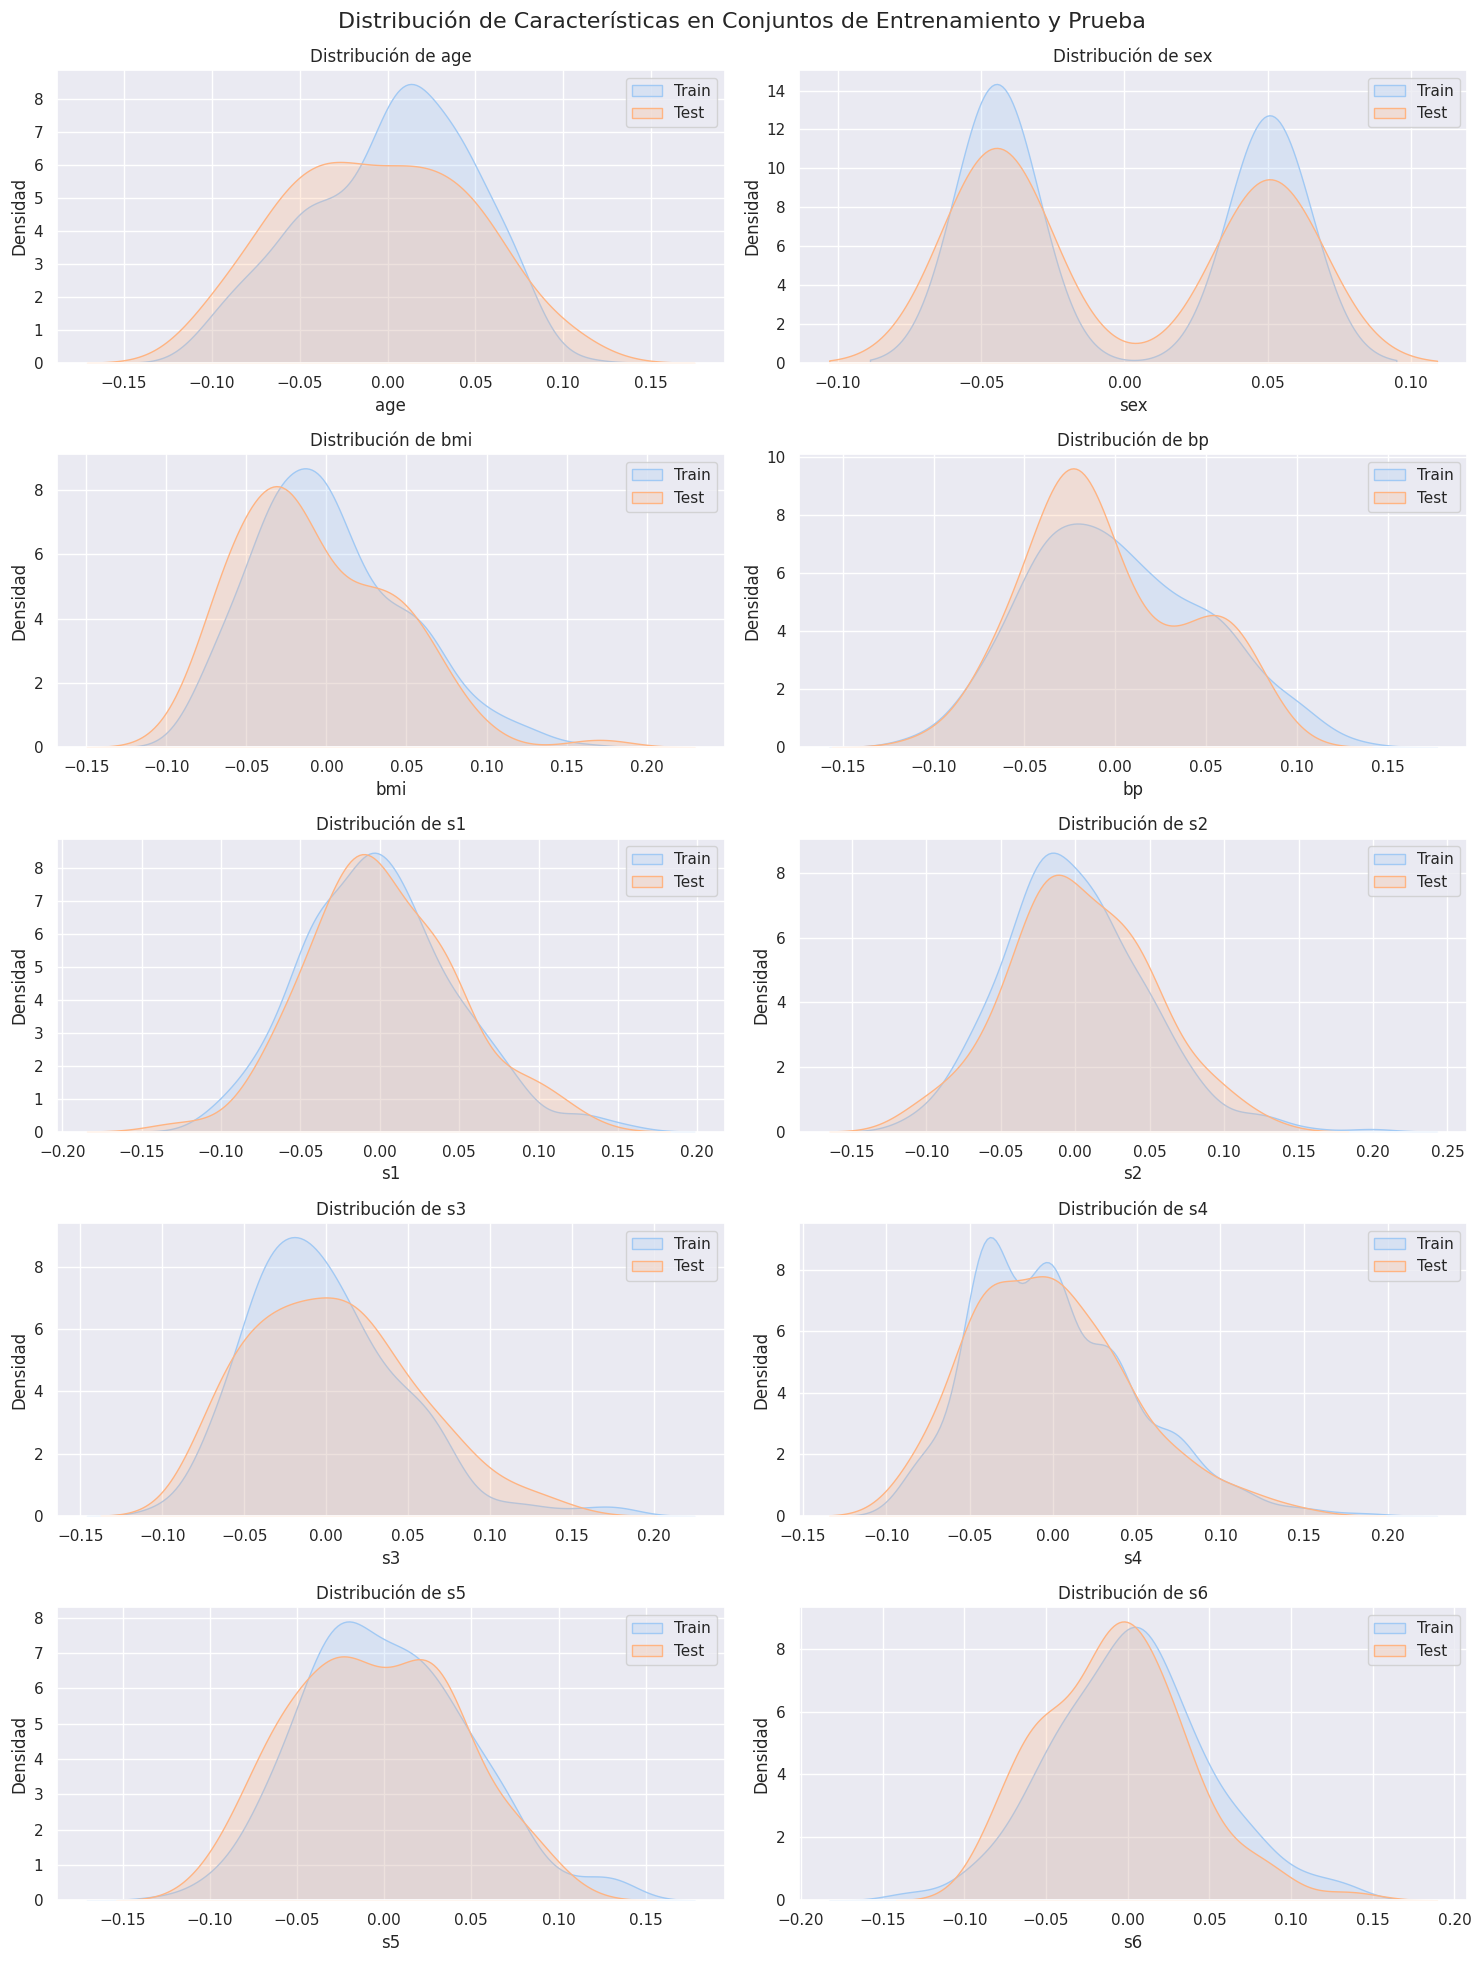

In [5]:
def visualize_train_test_distributions_for_features(X_train, X_test, feature_names):
    """
    Visualiza la distribución de características en los conjuntos de entrenamiento y prueba.

    Args:
    X_train (numpy.ndarray): Conjunto de datos de entrenamiento
    X_test (numpy.ndarray): Conjunto de datos de prueba
    feature_names (list): Lista de nombres de las características
    """
    n_features = X_train.shape[1]
    n_rows = (n_features + 1) // 2  # Calcula el número de filas necesarias

    fig, axes = plt.subplots(n_rows, 2, figsize=(15, 4*n_rows))
    fig.suptitle('Distribución de Características en Conjuntos de Entrenamiento y Prueba', fontsize=16)

    for i, feature in enumerate(feature_names):
        row = i // 2
        col = i % 2
        ax = axes[row, col] if n_rows > 1 else axes[col]

        sns.kdeplot(X_train[:, i], ax=ax, label='Train', fill=True)
        sns.kdeplot(X_test[:, i], ax=ax, label='Test', fill=True)

        ax.set_title(f'Distribución de {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Densidad')
        ax.legend()

    # Si el número de características es impar, elimina el último subplot vacío
    if n_features % 2 != 0:
        fig.delaxes(axes[-1, -1])

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)  # Ajusta el espacio para el título principal
    plt.show()

visualize_train_test_distributions_for_features(X_train, X_test, feature_names)

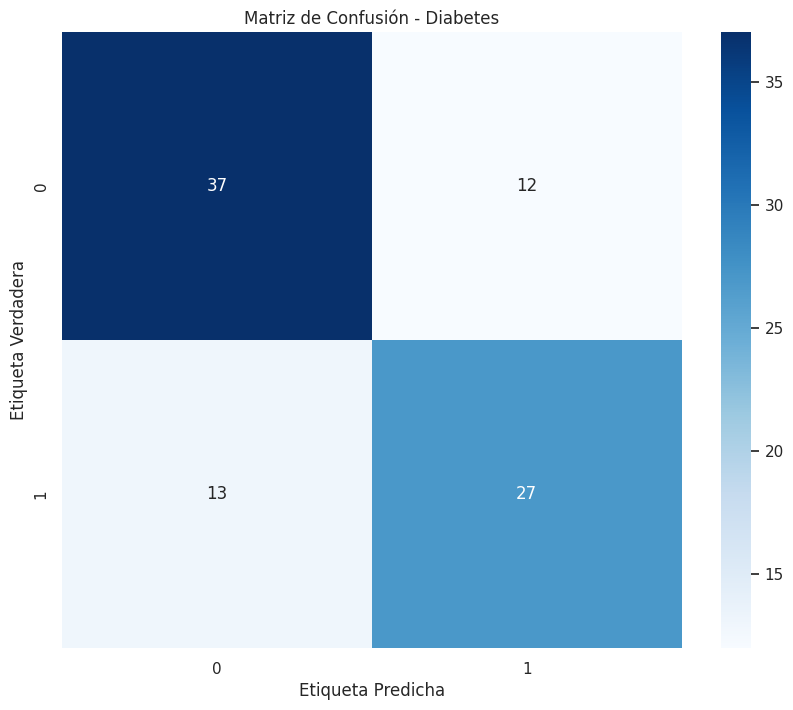

In [6]:
# Entrenar un modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Diabetes')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()


Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        49
           1       0.69      0.68      0.68        40

    accuracy                           0.72        89
   macro avg       0.72      0.72      0.72        89
weighted avg       0.72      0.72      0.72        89



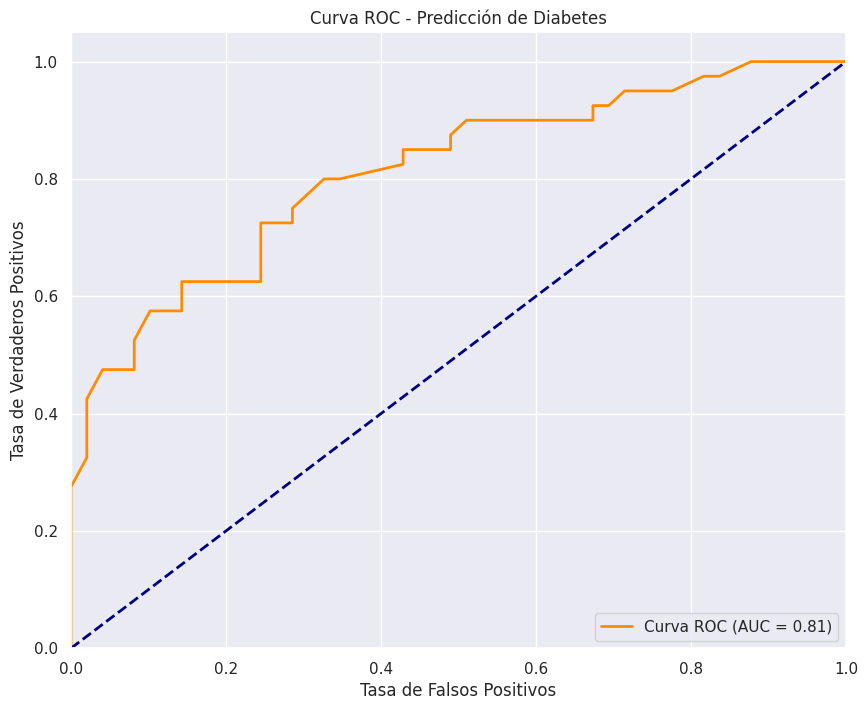

In [7]:

# Imprimir el informe de clasificación
print("Informe de Clasificación:")
print(classification_report(y_test, y_pred))

# Calcular y visualizar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Predicción de Diabetes')
plt.legend(loc="lower right")
plt.show()


In [8]:

# Calcular métricas específicas
tn, fp, fn, tp = cm.ravel()

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

print(f"Precisión: {precision:.2f}")
print(f"Sensibilidad (Recall): {sensitivity:.2f}")
print(f"Especificidad: {specificity:.2f}")
print(f"F1-Score: {f1_score:.2f}")

print(f"- El modelo identifica correctamente el {sensitivity*100:.1f}% de los casos positivos de diabetes (sensibilidad).")
print(f"- De los casos que el modelo predice como diabetes positivo, el {precision*100:.1f}% son realmente positivos (precisión).")
print(f"- El modelo identifica correctamente el {specificity*100:.1f}% de los casos negativos de diabetes (especificidad).")
print(f"- El F1-Score de {f1_score:.2f} indica un balance entre precisión y sensibilidad.")
print(f"- El AUC-ROC de {roc_auc:.2f} sugiere la capacidad discriminativa del modelo para la diabetes.")

Precisión: 0.69
Sensibilidad (Recall): 0.68
Especificidad: 0.76
F1-Score: 0.68
- El modelo identifica correctamente el 67.5% de los casos positivos de diabetes (sensibilidad).
- De los casos que el modelo predice como diabetes positivo, el 69.2% son realmente positivos (precisión).
- El modelo identifica correctamente el 75.5% de los casos negativos de diabetes (especificidad).
- El F1-Score de 0.68 indica un balance entre precisión y sensibilidad.
- El AUC-ROC de 0.81 sugiere la capacidad discriminativa del modelo para la diabetes.


# Interpretación de los resultados:
* El modelo identifica correctamente el 67.5% de los casos positivos de diabetes (sensibilidad).
* De los casos que el modelo predice como diabetes positivo, el 69.2% son realmente positivos (precisión).
* El modelo identifica correctamente el 75.5% de los casos negativos de diabetes (especificidad).
* El F1-Score de 0.68 indica un balance entre precisión y sensibilidad.
* El AUC-ROC de 0.81 sugiere la capacidad discriminativa del modelo para la diabetes.

## Conclusiones

1. **Rendimiento General**:
   - El modelo muestra un rendimiento moderado en la predicción de diabetes, con un AUC-ROC de 0.81, lo que indica una capacidad discriminativa buena, aunque no excelente.

2. **Balance entre Sensibilidad y Especificidad**:
   - La sensibilidad (67.5%) y la especificidad (75.5%) están relativamente equilibradas, con un ligero sesgo hacia la identificación correcta de casos negativos.
   - Este balance sugiere que el modelo es algo más conservador en la predicción de casos positivos.

3. **F1-Score**:
   - El F1-Score de 0.68 confirma un equilibrio razonable entre precisión y sensibilidad, aunque hay margen de mejora.

## Sugerencias de Mejora (generales)

1. **Ajuste del Umbral de Clasificación**:
   - Experimentar con diferentes umbrales de clasificación para encontrar un mejor balance entre sensibilidad y especificidad, especialmente si se prioriza la detección de casos positivos.

2. **Ingeniería de Características**:
   - Crear nuevas características o transformar las existentes para capturar mejor los patrones predictivos de la diabetes.

3. **Aumento de Datos**:
   - Si el conjunto de datos es pequeño, considerar técnicas de aumento de datos para mejorar la generalización del modelo.

4. **Manejo de Desbalance de Clases**:
   - Si existe un desbalance significativo entre las clases, considerar técnicas como SMOTE para sobremuestrear la clase minoritaria.

5. **Validación Cruzada**:
   - Utilizar validación cruzada para obtener una estimación más robusta del rendimiento del modelo y evitar el sobreajuste.

6. **Incorporación de Conocimiento Médico**:
   - Consultar con expertos en diabetes para incorporar conocimiento domain-specific en la selección y creación de características.

7. **Análisis de Errores**:
   - Realizar un análisis detallado de los casos mal clasificados para identificar patrones o subgrupos donde el modelo tiene un peor desempeño.

8. **Recopilación de Más Datos**:
    - Si es posible, recopilar más datos o incorporar fuentes de datos adicionales para enriquecer el conjunto de entrenamiento.

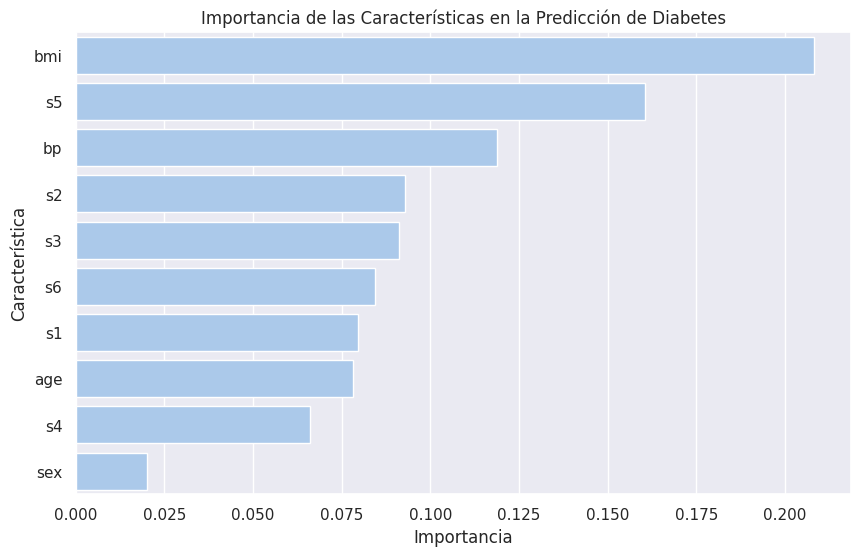


Importancia de las Características:
  feature  importance
2     bmi    0.208086
8      s5    0.160413
3      bp    0.118684
5      s2    0.092859
6      s3    0.091283
9      s6    0.084323
4      s1    0.079738
0     age    0.078318
7      s4    0.066106
1     sex    0.020190


In [9]:
# Importancia de las características
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Importancia de las Características en la Predicción de Diabetes')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

print("\nImportancia de las Características:")
print(feature_importance)

# Análisis de la Distribución de Probabilidades:
La distribución de probabilidades predichas puede ayudar a entender cómo el modelo está clasificando los casos. Una distribución bimodal podría indicar una buena separación entre clases. Si la distribución está sesgada hacia un extremo, podría ser necesario ajustar el umbral de clasificación.

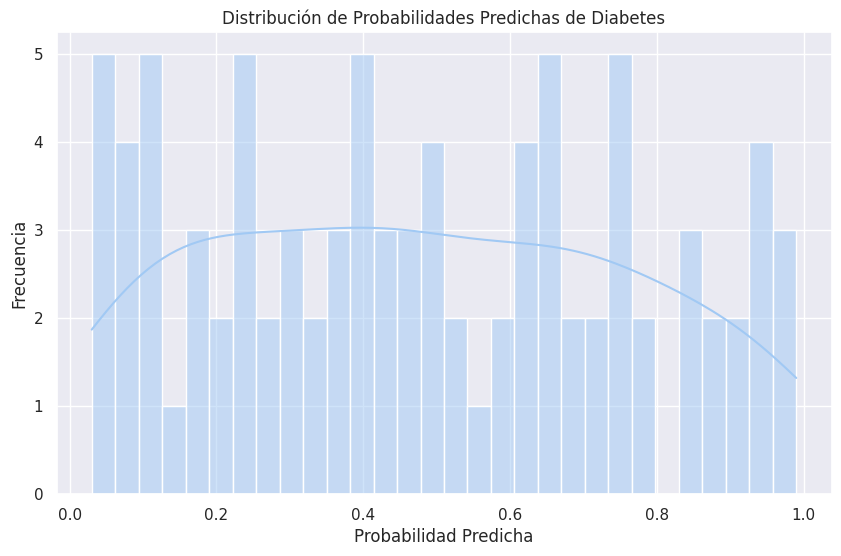

In [10]:
# Análisis adicional: Distribución de probabilidades predichas
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_proba, bins=30, kde=True)
plt.title('Distribución de Probabilidades Predichas de Diabetes')
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Frecuencia')
plt.show()

# Comentario final sobre la interpretación en el contexto de diabetes

Interpretación en el Contexto de Diabetes:

- La sensibilidad es crucial para identificar correctamente a los pacientes con riesgo de diabetes.
- La especificidad ayuda a evitar falsos positivos que podrían llevar a pruebas o tratamientos innecesarios.
- El balance entre sensibilidad y especificidad debe ajustarse según las consecuencias de los falsos positivos vs. falsos negativos en el contexto de la diabetes.
- La importancia de las características puede guiar a los médicos sobre qué factores son más relevantes para el riesgo de diabetes, lo que puede ser útil para la prevención y el manejo de la enfermedad.
- Este modelo podría ser útil como una herramienta de screening inicial, pero no debe reemplazar el diagnóstico médico profesional.
- Dada la naturaleza crítica de la detección de diabetes, se podría considerar ajustar el modelo para favorecer una mayor sensibilidad, aceptando un posible aumento en los falsos positivos que pueden ser descartados en exámenes posteriores.

Finalmente: Es crucial validar cualquier mejora del modelo (actualizaciones) con datos de prueba independientes y, en última instancia, en un entorno clínico real antes de su implementación.